In [1]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [134]:
dataset.shape

(1338, 6)

In [138]:
dataset.count()

age           1338
bmi           1338
children      1338
charges       1338
sex_male      1338
smoker_yes    1338
dtype: int64

In [2]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [3]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [4]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [5]:
dependent=dataset[['charges']]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, random_state=0)

In [120]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [126]:
#Multiple Linear Regression:
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression() 
# regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
# weights=regressor.coef_
# weights

In [ ]:
# bias=regressor.intercept_
# bias

In [128]:
# #SVM
# from sklearn.svm import SVR
# regressor=SVR(kernel="linear", C=100) 
# regressor.fit(x_train,y_train)
# # C=0.1-1000, #(kernel="linear","rbf","poly","sigmoid")

C:\Users\jayac\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, kernel='linear')

In [148]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="squared_error", max_features="log2", splitter="best") 
regressor.fit(x_train,y_train)
#criterion=(squared_error, friedman_mse, absolute_error, poisson) #max_features=(sqrt, log2, None, auto)

DecisionTreeRegressor(max_features='log2')

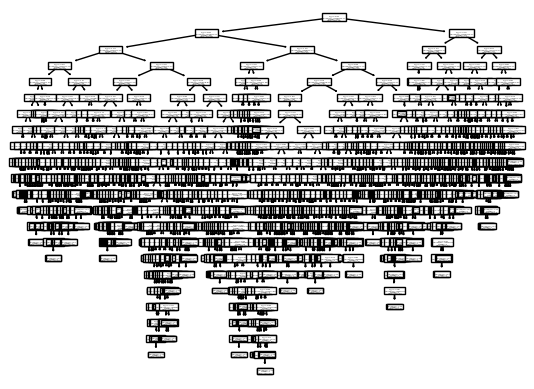

In [149]:
# import matplotlib.pyplot as plt
# from sklearn import tree
# tree.plot_tree(regressor)
# plt.show()

In [105]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, criterion="squared_error", max_features="log2") 
regressor.fit(x_train,y_train)
# n_estimators=10-100, #criterion=(squared_error, friedman_mse, absolute_error, poisson) #max_features=(sqrt, log2, None, auto)

C:\Users\jayac\AppData\Local\Temp\ipykernel_7772\3405906519.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor(max_features='log2')

In [109]:
y_predict=regressor.predict(x_test)
y_predict

array([10218.1666621 ,  9269.0489255 , 44221.950243  , 13824.9149711 ,
        9605.4299653 , 11602.9061276 ,  1993.62648167, 11949.7925347 ,
        7750.4486155 ,  5012.9257815 ,  6314.9461199 , 13635.6189463 ,
        8457.5967443 ,  5868.4679177 , 24071.1107439 , 12229.9711039 ,
       14059.8254002 ,  4869.1749053 ,  7337.6737392 , 30684.2146281 ,
       24402.2187135 , 13169.7521002 , 10310.9126956 , 27419.0681293 ,
        3438.1298069 ,  6000.9859786 ,  4441.1594565 ,  8878.9589408 ,
        3579.8482235 , 11020.7753936 ,  7712.917805  , 45324.7481536 ,
       15739.4260024 , 11807.3975632 , 17749.434303  ,  4755.984967  ,
        9253.4108904 , 37839.2609328 , 38395.7259908 ,  2393.6173725 ,
        6612.7443329 ,  3666.7433175 , 20595.8978405 , 46105.6762639 ,
       34696.138102  ,  3773.10941   , 12189.7229264 ,  6879.1355376 ,
        5894.5470028 , 13933.5238163 ,  2581.322508  ,  7743.6297817 ,
       26091.2898467 , 45550.6641692 , 11959.8922869 ,  7979.1163874 ,
      

In [110]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
r_score

0.8953409033050059

In [112]:
import pickle as pk
file_name="assignment_regression_randomforest_model.sav"

In [113]:
pk.dump(regressor,open(file_name,"wb"))

In [114]:
# load_file=pk.load(open(file_name,"rb"))
# result=load_file.predict([[12,234,34,12,23]])
# result

array([46372.0562907])

In [115]:
age=int(input("Enter the Age: "))
bmi=int(input("Enter the BMI value: "))
children=int(input("Enter the Count of the Children: "))
Sex=int(input("Enter the Sex(0-Female/1-Male): "))
smoker=int(input("Enter the whether you are a smoker(0-No/1-Yes): "))

load_file=pk.load(open(file_name,"rb"))
result=load_file.predict([[age,bmi,children,Sex,smoker]])
result

Enter the Age: 25
Enter the BMI value: 32
Enter the Count of the Children: 2
Enter the Sex(0-Female/1-Male): 1
Enter the whether you are a smoker(0-No/1-Yes): 0


array([15343.52143])